# EnKF Experiments - GCS benchmark

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [2]:
sys.path.append('../../../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder
from stationsim_gcs_model import Model

In [3]:
sys.path.append('../')
from experiment_utils import Modeller, Processor, Visualiser

In [4]:
%matplotlib inline
np.random.seed(42)

## Functions

In [5]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [11]:
data_dir = '../results/data/baseline/'
model_dir = '../results/models/baseline/'
fig_dir = '../results/figures/baseline/'

## Experiment 0 - Baseline

### Run experiment

#### Benchmark

In [7]:
Modeller.run_enkf_benchmark()

../../../../stationsim/ensemble_kalman_filter.py:170: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
filter_type:	EnsembleKalmanFilterType.STATE


#### Collisions

In [8]:
Modeller.run_model_collisions()

  0%|          | 0/20 [00:00<?, ?it/s]

Running for 5 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 10 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 15 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 20 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 25 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 30 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 35 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 40 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 45 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 50 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 55 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 60 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 65 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 70 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 75 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 80 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 85 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 90 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 95 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 100 agents


100%|██████████| 20/20 [16:35<00:00, 49.77s/it]


### Analysis

#### Benchmark

In [12]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,3.681879
2,2,3.681188
3,3,3.680497
4,4,3.679807


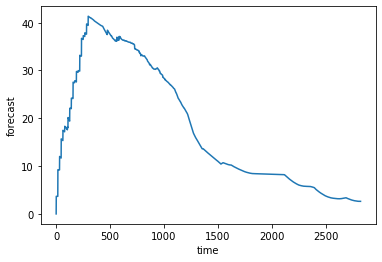

In [13]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.savefig(fig_dir + 'baseline_errors_10.pdf')
plt.show()

#### Collisions

In [14]:
collisions = pd.read_csv(data_dir + 'model_collisions.csv')
collisions.head()

,Unnamed: 0,collisions,population_size
0,0,31,5
1,1,8,5
2,2,4,5
3,3,4,5
4,4,59,5


In [15]:
if 'Unnamed: 0' in collisions.columns:
    collisions = collisions.drop('Unnamed: 0', axis=1)

In [16]:
collisions.head()

,collisions,population_size
0,31,5
1,8,5
2,4,5
3,4,5
4,59,5


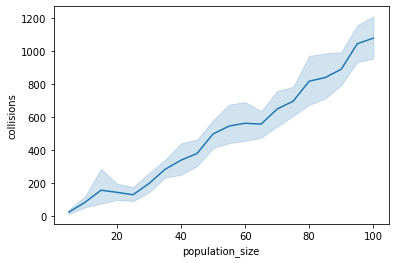

In [17]:
plt.figure()
sns.lineplot(x='population_size', y='collisions', data=collisions)
plt.savefig(fig_dir + 'baseline_collisions.pdf')
plt.show()